Module 1: Rocket Flight

In [376]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

Equations de la roquette pour un mouvement purement vertical:

\begin{align} \frac{dh}{dt} &= v\\ (m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D \end{align}

Valeurs initiales du problème:

In [377]:
ms = 50 # Masse de la rocket en kg
g = 9.81 # valeur de l'accélération gravitationnelle en m/s²
d = 1.091 # densité de l'air en kg/m³
r = 0.5 # rayon de la roquette en m
A = (numpy.pi)*(0.5**2) # aire de la roquette en m²
ve = 325 # vitesse d'éjection du gaz en m/s
Cd = 0.15 # coefficient de frottement de l'air
mpo = 100 # masse initial du carburant en kg
h0 = 0 # hauteur initiale en m
v0 = 0 # vitesse initiale en m/s

Création d'une échelle de temps et d'une liste vide u à deux dimensions: 

In [378]:
Te = 50         # Limite de l'échelle de temps
dt = 0.1        # Graduation de l'échelle de temps                   
N = int(Te/dt) + 1     # Nombre de graduations de l'échelles de temps             
t = numpy.linspace(0, Te, N)     # Echelle de temps


u = numpy.empty((N, 2))     # Liste à deux dimensions qui va reprendre l'altitude et la vitesse pour chaque graduation 
u[0] = numpy.array([h0,v0]) # Valeurs initiales de l'altitude et de la vitesse

Définition de la fonction reprenant la variation de la masse du carburant:

In [379]:
def dmp(tp):
    if tp < 5: # temps que le temps est inférieur à 5 secondes, la variation de la masse de carburant est égale à 20 kg/s
        d_mp=20
    else : # après elle est égale à zéro
        d_mp=0
    return d_mp

Définition de la fonction reprenant la masse du carburant en fonction du temps:

In [380]:
def mp(tp):
    if tp < 5: # temps que le temps est inférieur à 5 secondes, la masse décroit de 20 kg/s
        m_p = mpo - dmp(tp)*tp
    else: # après 5s, il n'y a plus de carburant
        m_p = 0
    return m_p

Definition de la fonction reprenant l'équation du mouvement qui donne l'altitude et la vitesse à un instant t:

In [381]:
def f(u):
    h=u[0] 
    v=u[1]
    return numpy.array([v, (-g + (dmp(t[n])*ve)/(ms+mp(t[n]))- 0.5*(v*abs(v))*(d*A*Cd)/(ms+mp(t[n])))])
    # Renvois un liste avec la valeur de l'altitude en première position et la valeur de la vitesse en deuxième position   

Définiton de la fonction utilisant la méthode d'Euler pour trouver l'altitude et la vitesse de la roquette 

In [382]:
def euler_step(u, f, dt) :
    return u + dt * f(u)
    #Renvois la valeur suivante (après un temps dt) de l'altitude et de la vitesse de la roquette

In [384]:
Te = 50                       
dt = 0.1                           
N = int(Te/dt) + 1                  
t = numpy.linspace(0, Te, N)     


u = numpy.empty((N, 2))
u[0] = numpy.array([h0,v0])


for n in range(N-1):
    
    u[n+1] = euler_step(u[n], f, dt) # Remplis le tableau vide à deux dimension u avec les couples
                                     # altitude/vitesse de la roquette pour chaque instant t grâce
                                     # à la méthode d'Euler.

Solutions aux questions posées:
Carburant restant après 3.2 secondes

Utilisons la fonction mp(t) définie plus haut pour trouver la valeur de la masse de carburant restant après 3.2 secondes.

In [385]:
mp(3.2) # Fonction mp lorsque t=3.2s 

36.0

Nous obtenons que la masse restante est de 36.0 kg

Quelle est la vitesse maximale, à quel moment est t'elle atteinte et à quelle altitude est la fusée à ce moment?

In [386]:
for n in range(N-1):
    if u[n][1]<=u[n+1][1]: #Pour chaque valeur de n jusquà N-1, on regarde si la valeur du deuxième élément du 
                           # n-ème couple (la vitesse) est plus petite ou égale à celle du deuxième élément du
                           # couple suivant.Si c'est le cas:
        vmax=u[n+1][1]     # vmax prend la valeur de la vitesse du couple suivant
        tvmax=(n+1)/10     # tvmax prend la valeur de l'instant auquel celà ce produit 
        hvmax=u[n+1][0]    # hvmax prend la valeur de l'altitude de la roquette à ce moment
print("La valeur maximale de la vitesse (en m/s) est:") # La boucle s'arrête lorsque ceci n'est plus vrai et renvois
print(vmax)                                             # les valeurs demandées.
print("Cette vitesse est atteinte après (en seconde):")
print(tvmax)
print("L'altitude (en m) à ce moment est de:")
print(hvmax)

La valeur maximale de la vitesse (en m/s) est:
232.106133413
Cette vitesse est atteinte après (en seconde):
5.0
L'altitude (en m) à ce moment est de:
523.522834292


Quelle est la hauteur maximale atteinte et à quel instant est elle atteinte?

In [387]:
for n in range(N-1):
    if u[n][0]<=u[n+1][0]:      # Pour chaque valeur de n jusquà N-1, on regarde si la valeur du premier élément
          x=u[n+1][0]           # du n-ème couple (l'altitude) est inférieure ou égale à celle du premier
                                # élément du couple suivant. Si c'est le cas:
                                # x prend la valeur de l'altitude à cet instant
            
print ("L'altitude maximale (en mètre) est:")            
print(x)                                      # La boucle s'arrête lorsque ceci n'est plus vrai et renvois
                                              # l'altitude maximale.
                                # Pour chaque valeur de n jusquà N-1, on regarde si la valeur du premier élément du
                                # n-ème couple (l'altitude) est égale à celle de x. Si c'est le cas:
for n in range(N-1):            # thmax prend la valeur de l'instant auquel celà ce produit.
                                # La boucle s'arrête une fois la valeur trouvée et renvois cette dernière.
    if u[n][0] == x :
        thmax=n/10
        print ("Cela se produit après (en seconde):")
        print (thmax)


L'altitude maximale (en mètre) est:
1334.18294543
Cela se produit après (en seconde):
15.7


A quelle moment se produit l'impacte et quelle est la vitesse de la roquette à ce moment?

In [388]:
for n in range(N-1):
    if u[n][0]>=u[n+1][0] and u[n][0]>=0: # Pour chaque valeur de n jusquà N-1, on regarde si la valeur du premier
                                          # élément du n-ème couple (l'altitude) est supérieure ou égale à celle
                                          # du premier élément du couple suivant. Si c'est le cas:
        tcrash=(n+1)/10                   # tcrash prend la valeur de l'instant où la roquette se crash
        vcrash=u[n+1][1]                  # vcrash prend la valeur de la vitesse à l'instant du crash
print ("Le crash se produit après (en seconde):")
print (tcrash)                            # La boucle s'arrête lorsque ceci n'est plus vrai et renvois les valeurs
print ("La vitesse (en m/s) au moment de l'impact est de:")
print (vcrash)                            # demandées.

Le crash se produit après (en seconde):
37.1
La vitesse (en m/s) au moment de l'impact est de:
-86.0068349838


Graphiques

In [389]:
#Création d'intervalles adaptés au graphique et créations des axes
T = 37.1
dt = 0.1                           
Ng = int(T/dt) + 1                  
tgr = numpy.linspace(0, T, Ng)
ugr = numpy.empty((Ng, 2))
ugr[0] = numpy.array([h0,v0])


for n in range(Ng-1):
    
    ugr[n+1] = euler_step(ugr[n], f, dt)

y=ugr[:,1]
x=tgr


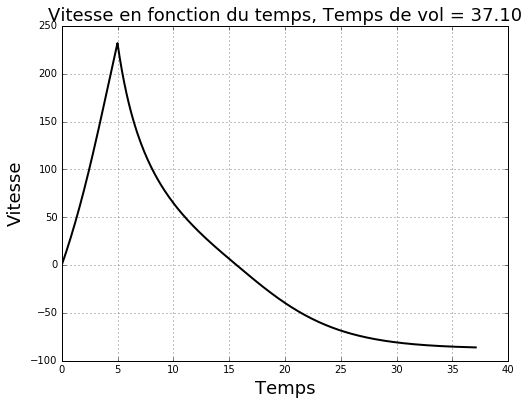

In [390]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'Temps', fontsize=18)
pyplot.ylabel(r'Vitesse', fontsize=18)
pyplot.title('Vitesse en fonction du temps, Temps de vol = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);

In [391]:
# Changement de l'axe y pour qu'il indique l'altitude
y=ugr[:,0]

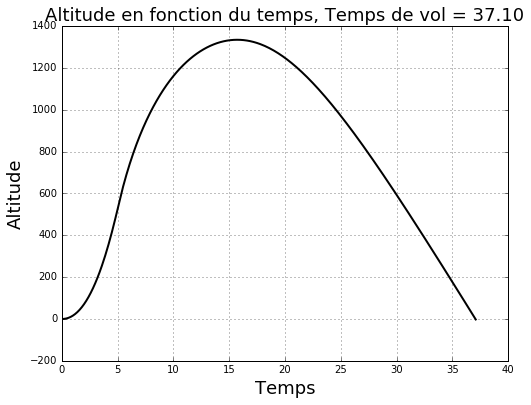

In [392]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'Temps', fontsize=18)
pyplot.ylabel(r'Altitude', fontsize=18)
pyplot.title('Altitude en fonction du temps, Temps de vol = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);